# Data Ingestion

In [841]:
# import all necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from zipfile import ZipFile

In [842]:
path= r"C:\Users\user322\Desktop\Machine_Learning\customer behaviour\archive.zip"

In [843]:
with ZipFile(path, "r") as f:
    f.printdir()

File Name                                             Modified             Size
DATASET_README.md                              2025-11-09 07:40:30         5781
ecommerce_customer_behavior_dataset.csv        2025-11-09 07:40:30       563179
ecommerce_customer_behavior_dataset_v2.csv     2025-11-09 07:40:30      1959560
ecommerce_dataset_readme_v_2.md                2025-11-09 07:40:30         6592


In [844]:
with ZipFile(path, "r") as f:
    with f.open("ecommerce_customer_behavior_dataset.csv") as file:
        df= pd.read_csv(file)

In [845]:
df.head(5)

,Order_ID,Customer_ID,Date,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,ORD_001337,CUST_01337,2023-01-01,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,ORD_004885,CUST_04885,2023-01-01,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,ORD_004507,CUST_04507,2023-01-01,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,ORD_000645,CUST_00645,2023-01-01,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,ORD_000690,CUST_00690,2023-01-01,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4


# Premilary Data Analysis

In [846]:
df.columns

Index(['Order_ID', 'Customer_ID', 'Date', 'Age', 'Gender', 'City',
       'Product_Category', 'Unit_Price', 'Quantity', 'Discount_Amount',
       'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating'],
      dtype='object')

In [847]:
df.dtypes

Order_ID                     object
Customer_ID                  object
Date                         object
Age                           int64
Gender                       object
City                         object
Product_Category             object
Unit_Price                  float64
Quantity                      int64
Discount_Amount             float64
Total_Amount                float64
Payment_Method               object
Device_Type                  object
Session_Duration_Minutes      int64
Pages_Viewed                  int64
Is_Returning_Customer          bool
Delivery_Time_Days            int64
Customer_Rating               int64
dtype: object

In [848]:
df.shape

(5000, 18)

In [849]:
df.duplicated().sum()

np.int64(0)

# Exploratory Data Analysis

Descriptive Data Analysis

In [850]:
df.info

<bound method DataFrame.info of         Order_ID Customer_ID        Date  Age  Gender      City  \
0     ORD_001337  CUST_01337  2023-01-01   27  Female     Bursa   
1     ORD_004885  CUST_04885  2023-01-01   42    Male     Konya   
2     ORD_004507  CUST_04507  2023-01-01   43  Female    Ankara   
3     ORD_000645  CUST_00645  2023-01-01   32    Male  Istanbul   
4     ORD_000690  CUST_00690  2023-01-01   40  Female  Istanbul   
...          ...         ...         ...  ...     ...       ...   
4995  ORD_001048  CUST_01048  2024-03-26   18  Female     Izmir   
4996  ORD_001051  CUST_01051  2024-03-26   27    Male     Adana   
4997  ORD_003543  CUST_03543  2024-03-26   45  Female   Antalya   
4998  ORD_004443  CUST_04443  2024-03-26   41  Female  Istanbul   
4999  ORD_000902  CUST_00902  2024-03-26   30  Female     Konya   

     Product_Category  Unit_Price  Quantity  Discount_Amount  Total_Amount  \
0                Toys       54.28         1             0.00         54.28   
1      

In [851]:
df.describe().T.style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Age,5000.000000,35.032600,11.080546,18.000000,27.000000,35.000000,42.000000,75.000000
Unit_Price,5000.000000,455.834120,712.477209,5.180000,76.587500,182.950000,513.930000,7159.450000
Quantity,5000.000000,2.220000,1.398711,1.000000,1.000000,2.000000,3.000000,5.000000
Discount_Amount,5000.000000,24.852804,88.385124,0.000000,0.000000,0.000000,8.760000,1525.550000
Total_Amount,5000.000000,983.108914,1898.978528,7.870000,122.517500,337.910000,979.695000,22023.900000
Session_Duration_Minutes,5000.000000,14.573400,8.665750,1.000000,8.000000,13.000000,19.000000,73.000000
Pages_Viewed,5000.000000,8.984200,2.804340,1.000000,7.000000,9.000000,11.000000,24.000000
Delivery_Time_Days,5000.000000,6.497000,3.464966,1.000000,4.000000,6.000000,8.000000,25.000000
Customer_Rating,5000.000000,3.902800,1.128542,1.000000,3.000000,4.000000,5.000000,5.000000


In [852]:
categorical_col= df.select_dtypes(include='object').columns

In [853]:
numerical_col = df.select_dtypes(include='number').columns


In [854]:
numerical_col.nunique()

9

In [855]:
for col in numerical_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

Age
18    453
37    196
34    179
32    176
40    170
38    169
35    165
41    156
28    154
33    150
39    147
31    146
42    145
27    144
29    142
30    141
43    132
36    130
25    127
26    117
23    116
45    114
44    111
24    106
46    104
47     98
22     95
49     93
21     86
48     79
20     79
50     66
19     63
52     58
51     56
54     51
53     50
55     42
57     32
56     31
59     24
60     21
58     19
62     12
61     10
63      8
64      7
65      7
66      5
72      4
68      3
71      2
73      2
75      2
67      2
70      2
69      1
Name: count, dtype: int64

Unit_Price
30.10     4
19.84     3
141.76    3
25.17     3
135.83    3
         ..
69.79     1
50.69     1
130.35    1
71.55     1
744.29    1
Name: count, Length: 4785, dtype: int64

Quantity
1    2242
2    1073
3     590
5     562
4     533
Name: count, dtype: int64

Discount_Amount
0.00     3474
7.88        5
15.00       4
12.37       3
11.57       3
         ... 
71.76       1
8.48        1
4

In [856]:
for col in categorical_col:
    df[col].value_counts()
    print(df[col].value_counts())
    print("="*30)
    print()

Order_ID
ORD_001337    1
ORD_004885    1
ORD_004507    1
ORD_000645    1
ORD_000690    1
             ..
ORD_001048    1
ORD_001051    1
ORD_003543    1
ORD_004443    1
ORD_000902    1
Name: count, Length: 5000, dtype: int64

Customer_ID
CUST_01337    1
CUST_04885    1
CUST_04507    1
CUST_00645    1
CUST_00690    1
             ..
CUST_01048    1
CUST_01051    1
CUST_03543    1
CUST_04443    1
CUST_00902    1
Name: count, Length: 5000, dtype: int64

Date
2023-07-14    22
2024-01-05    21
2023-02-28    19
2023-10-11    19
2023-08-21    19
              ..
2023-11-04     4
2023-09-04     4
2023-07-02     4
2023-05-13     4
2023-01-18     4
Name: count, Length: 451, dtype: int64

Gender
Female    2492
Male      2435
Other       73
Name: count, dtype: int64

City
Istanbul     1284
Ankara        735
Izmir         600
Bursa         496
Adana         378
Antalya       374
Gaziantep     349
Konya         317
Kayseri       257
Eskisehir     210
Name: count, dtype: int64

Product_Category
Sport

In [857]:
df= df.drop(columns=['Order_ID'])

In [858]:
df= df.drop(columns=['Customer_ID'])

In [859]:
df= df.drop(columns=['Date'])

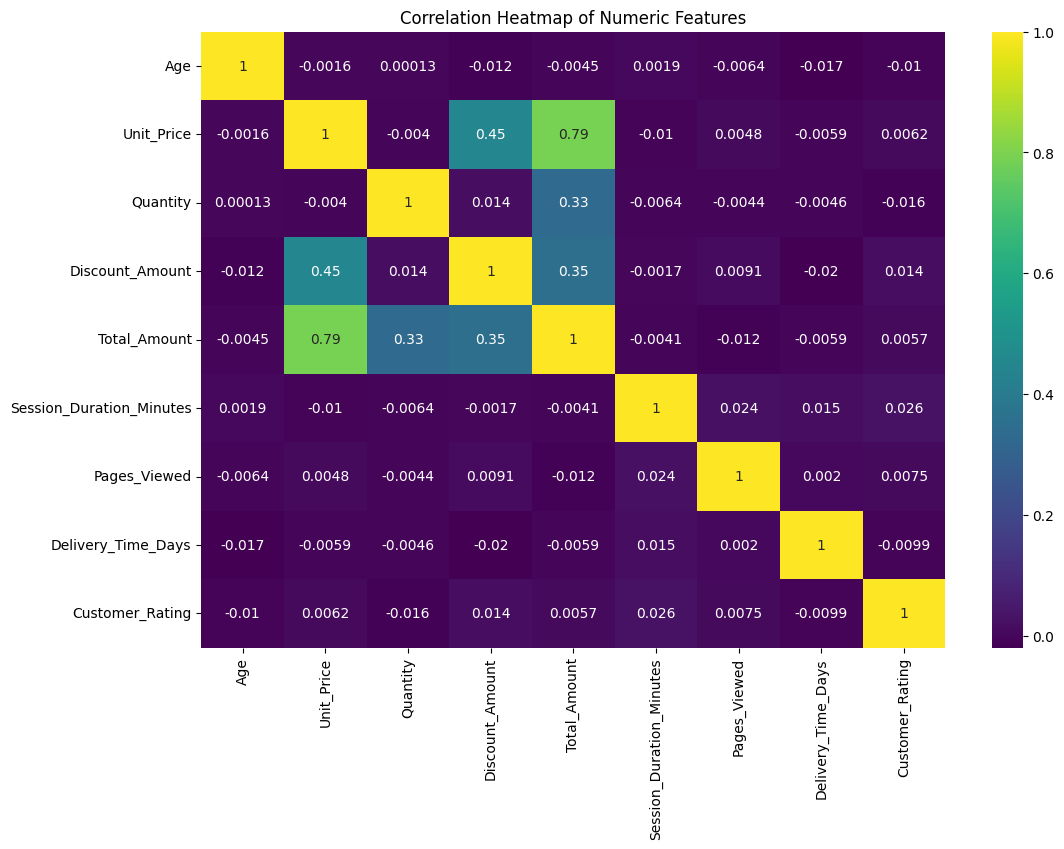

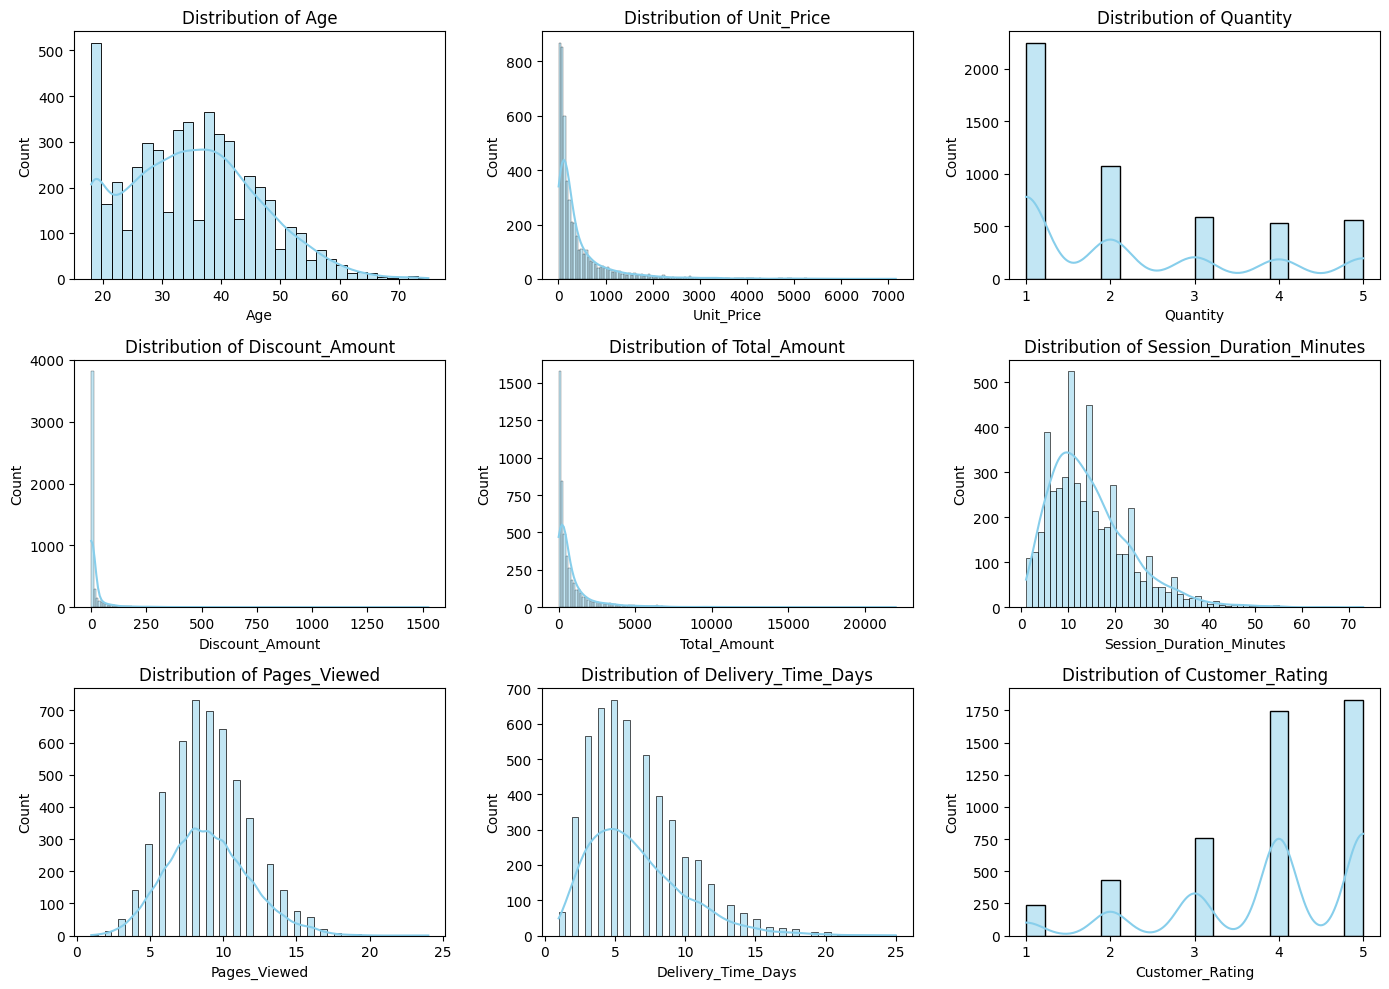

C:\Users\user322\AppData\Local\Temp\ipykernel_19500\632578759.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Payment_Method', palette='pastel')


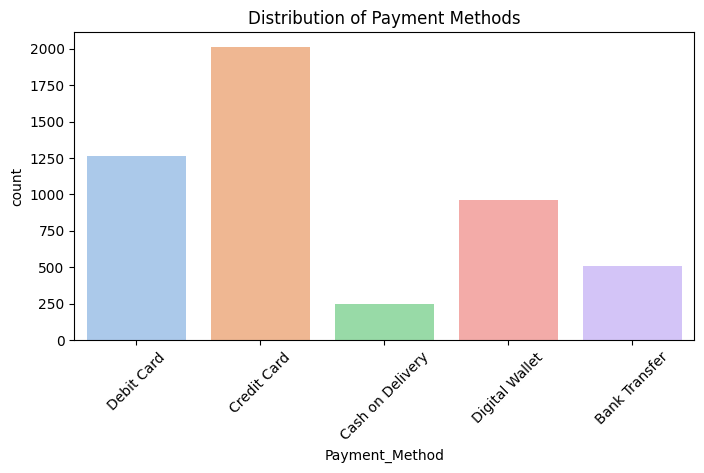

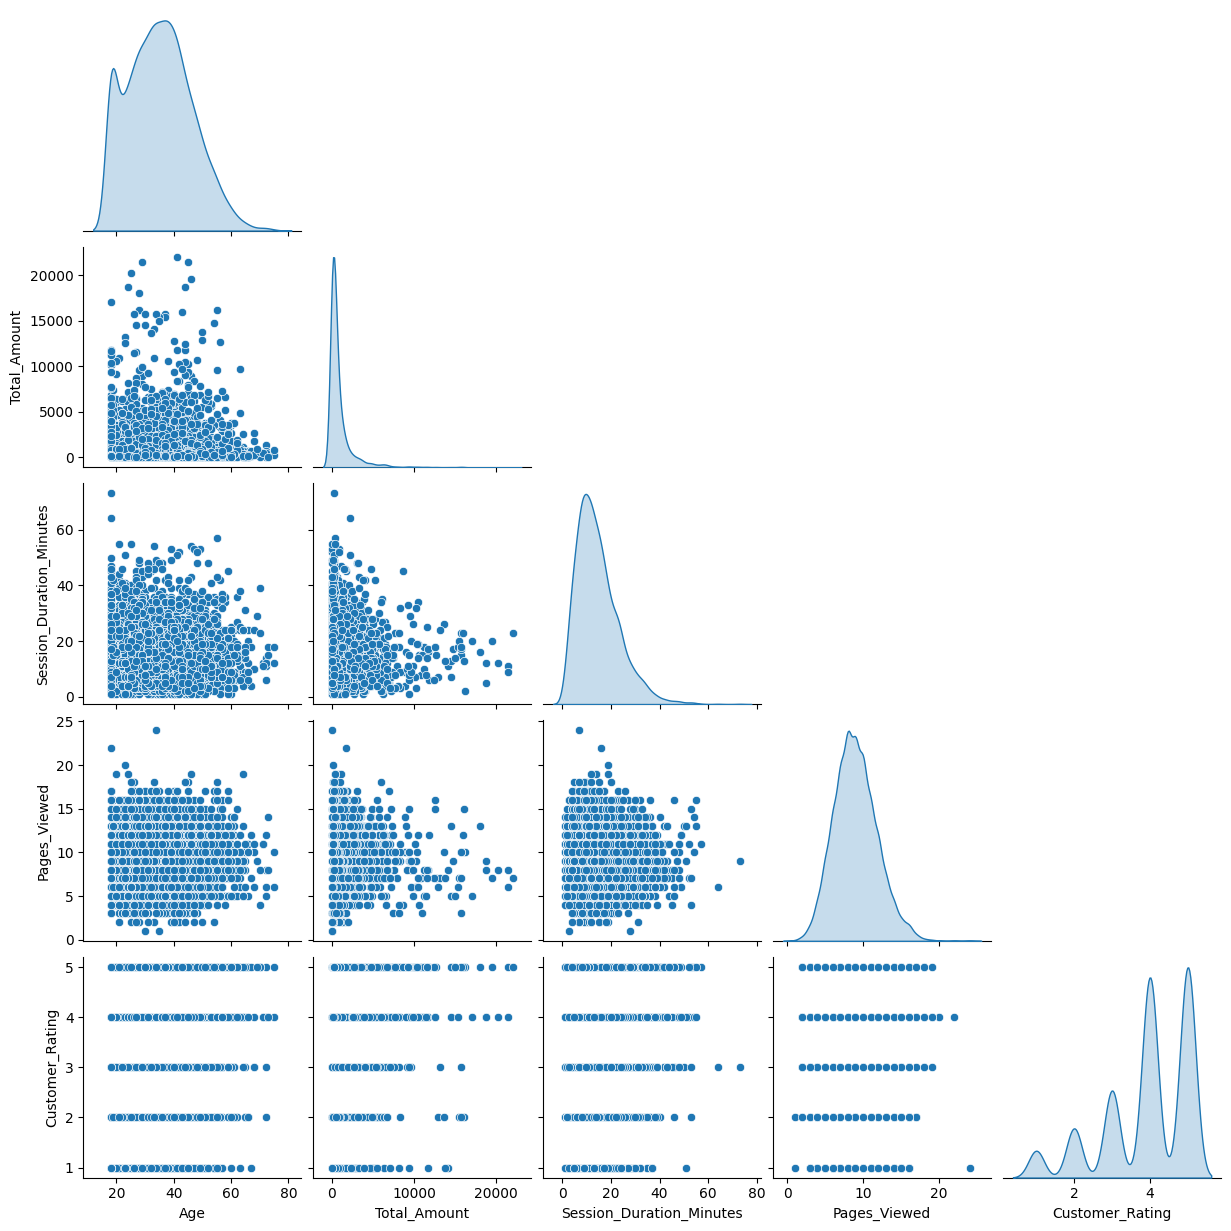

In [860]:
# Exploratory Data Analysis

# Let's examine the numeric features only for some analyses
numeric_df = df.select_dtypes(include=[np.number])

# If there are four or more numeric columns, display a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(12, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='viridis')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.show()
else:
    print('Not enough numeric columns to generate a correlation heatmap.')

# Plotting distributions for some key numeric variables
numeric_columns = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 
                   'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating']

plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[col].dropna(), kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
plt.show()

# Count plot for categorical variable: Payment_Method
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Payment_Method', palette='pastel')
plt.title('Distribution of Payment Methods')
plt.xticks(rotation=45)
plt.show()

# Pair plot for a subset of features to visually inspect relationships
subset_features = ['Age', 'Total_Amount', 'Session_Duration_Minutes', 'Pages_Viewed', 'Customer_Rating']
sns.pairplot(df[subset_features].dropna(), diag_kind='kde', corner=True)
plt.show()

# Data Preprocessing

In [861]:
df

,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,27,Female,Bursa,Toys,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,42,Male,Konya,Toys,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,43,Female,Ankara,Food,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,32,Male,Istanbul,Electronics,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,40,Female,Istanbul,Sports,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,Female,Izmir,Beauty,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,27,Male,Adana,Beauty,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,45,Female,Antalya,Food,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,41,Female,Istanbul,Fashion,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [862]:
Payment_Method= df["Payment_Method"].unique()
Payment_Method


array(['Debit Card', 'Credit Card', 'Cash on Delivery', 'Digital Wallet',
       'Bank Transfer'], dtype=object)

In [863]:
Device_Type= df["Device_Type"].unique()
Device_Type

array(['Mobile', 'Desktop', 'Tablet'], dtype=object)

In [864]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

In [865]:
df.head(1)

,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,27,Female,Bursa,Toys,54.28,1,0.0,54.28,Debit Card,Mobile,4,14,True,8,5


In [866]:
from sklearn.calibration import LabelEncoder
encoder = LabelEncoder()



encoded_labels = encoder.fit_transform(df["Product_Category"])
print("Original labels:", encoded_labels)

df["Product_Category"]= encoder.fit_transform(df["Product_Category"])


Original labels: [7 7 4 ... 4 3 1]


In [867]:
df

,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,27,Female,Bursa,7,54.28,1,0.00,54.28,Debit Card,Mobile,4,14,True,8,5
1,42,Male,Konya,7,244.90,1,0.00,244.90,Credit Card,Mobile,11,3,True,3,3
2,43,Female,Ankara,4,48.15,5,0.00,240.75,Credit Card,Mobile,7,8,True,5,2
3,32,Male,Istanbul,2,804.06,1,229.28,574.78,Credit Card,Mobile,8,10,False,1,4
4,40,Female,Istanbul,6,755.61,5,0.00,3778.05,Cash on Delivery,Desktop,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,Female,Izmir,0,130.35,1,27.30,103.05,Bank Transfer,Mobile,17,10,False,9,1
4996,27,Male,Adana,0,71.55,1,0.00,71.55,Debit Card,Mobile,13,9,True,6,4
4997,45,Female,Antalya,4,39.38,1,5.27,34.11,Digital Wallet,Mobile,38,10,True,5,4
4998,41,Female,Istanbul,3,171.19,1,0.00,171.19,Credit Card,Mobile,20,12,True,5,4


In [868]:
Device_Type= df["Device_Type"].unique()

df["Device_Type"]= encoder.fit_transform(df["Device_Type"])

In [869]:
Payment_Method= df["Payment_Method"].unique()

df["Payment_Method"]= encoder.fit_transform(df["Product_Category"])

In [870]:
City= df["City"].unique()

df["City"]= encoder.fit_transform(df["City"])

In [871]:
df

,Age,Gender,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating
0,27,Female,3,7,54.28,1,0.00,54.28,7,1,4,14,True,8,5
1,42,Male,9,7,244.90,1,0.00,244.90,7,1,11,3,True,3,3
2,43,Female,1,4,48.15,5,0.00,240.75,4,1,7,8,True,5,2
3,32,Male,6,2,804.06,1,229.28,574.78,2,1,8,10,False,1,4
4,40,Female,6,6,755.61,5,0.00,3778.05,6,0,21,10,True,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,Female,7,0,130.35,1,27.30,103.05,0,1,17,10,False,9,1
4996,27,Male,0,0,71.55,1,0.00,71.55,0,1,13,9,True,6,4
4997,45,Female,2,4,39.38,1,5.27,34.11,4,1,38,10,True,5,4
4998,41,Female,6,3,171.19,1,0.00,171.19,3,1,20,12,True,5,4


In [872]:

# from sklearn.preprocessing import OrdinalEncoder


# Product_Category = [["Sports","Electronics","Fashion","Beauty","Home & Garden" ,"Food","Books","Toys"]]


# order= LabelEncoder()
# df['Product_Category']=order.fit_transform(df[['Product_Category']])


In [873]:
from sklearn.preprocessing import OneHotEncoder


Gender= [['Male', 'Female', 'Other']]

ohe= OneHotEncoder(categories=Gender, sparse_output=False, handle_unknown='ignore')
encoded_data=ohe.fit_transform(df[["Gender"]])

encoded_df = pd.DataFrame(
    encoded_data,
    columns=ohe.get_feature_names_out(['Gender'])
)

encoded_df.index = df.index
df = pd.concat([df.drop(columns=['Gender']), encoded_df], axis=1)

In [874]:
df

,Age,City,Product_Category,Unit_Price,Quantity,Discount_Amount,Total_Amount,Payment_Method,Device_Type,Session_Duration_Minutes,Pages_Viewed,Is_Returning_Customer,Delivery_Time_Days,Customer_Rating,Gender_Male,Gender_Female,Gender_Other
0,27,3,7,54.28,1,0.00,54.28,7,1,4,14,True,8,5,0.0,1.0,0.0
1,42,9,7,244.90,1,0.00,244.90,7,1,11,3,True,3,3,1.0,0.0,0.0
2,43,1,4,48.15,5,0.00,240.75,4,1,7,8,True,5,2,0.0,1.0,0.0
3,32,6,2,804.06,1,229.28,574.78,2,1,8,10,False,1,4,1.0,0.0,0.0
4,40,6,6,755.61,5,0.00,3778.05,6,0,21,10,True,7,4,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,18,7,0,130.35,1,27.30,103.05,0,1,17,10,False,9,1,0.0,1.0,0.0
4996,27,0,0,71.55,1,0.00,71.55,0,1,13,9,True,6,4,1.0,0.0,0.0
4997,45,2,4,39.38,1,5.27,34.11,4,1,38,10,True,5,4,0.0,1.0,0.0
4998,41,6,3,171.19,1,0.00,171.19,3,1,20,12,True,5,4,0.0,1.0,0.0


In [875]:
# Converting the boolean target to integer
df['Is_Returning_Customer'].astype(int)

0       1
1       1
2       1
3       0
4       1
       ..
4995    0
4996    1
4997    1
4998    1
4999    1
Name: Is_Returning_Customer, Length: 5000, dtype: int64

In [876]:
from sklearn.discriminant_analysis import StandardScaler
from sklearn.model_selection import train_test_split


x= df.drop(columns=["Is_Returning_Customer"])
y= df["Is_Returning_Customer"]
scaler = StandardScaler()
numerical_col = numerical_col.drop('Is_Returning_Customer', errors='ignore')

x[numerical_col]= scaler.fit_transform(x[numerical_col])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)


In [877]:
# let scale the numerical columns using minmax scaler 
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x[numerical_col]= scaler.fit_transform(x[numerical_col])

# let scale the numerical columns in test data too
df[numerical_col]=scaler.transform(df[numerical_col])

In [878]:
print("shape of Training set : ", x_train.shape)
print("Shape of test set : ", x_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

shape of Training set :  (3500, 16)
Shape of test set :  (1500, 16)
Percentage of classes in training set:
Is_Returning_Customer
True     0.598
False    0.402
Name: proportion, dtype: float64
Percentage of classes in test set:
Is_Returning_Customer
True     0.598
False    0.402
Name: proportion, dtype: float64


In [879]:
df.columns

Index(['Age', 'City', 'Product_Category', 'Unit_Price', 'Quantity',
       'Discount_Amount', 'Total_Amount', 'Payment_Method', 'Device_Type',
       'Session_Duration_Minutes', 'Pages_Viewed', 'Is_Returning_Customer',
       'Delivery_Time_Days', 'Customer_Rating', 'Gender_Male', 'Gender_Female',
       'Gender_Other'],
      dtype='object')

Accuracy of the Returning customer Predictor: 0.599

Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.00      0.00       603
        True       0.60      1.00      0.75       897

    accuracy                           0.60      1500
   macro avg       0.80      0.50      0.38      1500
weighted avg       0.76      0.60      0.45      1500



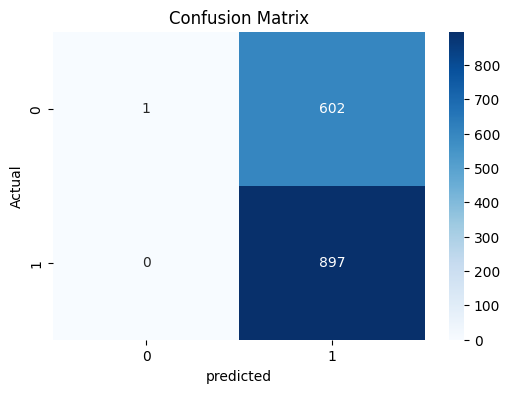

ValueError: All arrays must be of the same length

In [ ]:
# initializing and train Logistic Regression model 
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


#Preparing the data
features = ['Age', 'Unit_Price', 'Quantity', 'Discount_Amount', 'Total_Amount', 
            'Session_Duration_Minutes', 'Pages_Viewed', 'Delivery_Time_Days', 'Customer_Rating']


model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


# Making predictions
y_pred = model.predict(x_test)

# Evaluating the model performance using Accruracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Returning customer Predictor: {accuracy:.3f}")


# Displaying a detailed classification report
print('\nClassification Report:')
print(classification_report(y_test, y_pred))

# Creating confusion matrix heatmap
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('predicted')
plt.ylabel('Actual')
plt.show()


# # Calculating and plotting permutation importance
# result = permutation_importance(model, x_test, y_test, n_repeats=10, random_state=42)
# importance_df = pd.DataFrame({
#     'Feature': features,
#     'Importance': result.importances_mean
# }).sort_values(by='Importance', ascending=True)

# plt.figure(figsize=(8, 6))
# plt.barh(importance_df['numerical_col'], importance_df['Importance'], color='teal')
# plt.title('Permutation Importance of Features')
# plt.xlabel('Mean Importance')
# plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
models = {
        'Logistic Regression': LogisticRegression(),
        'Random Forest': RandomForestClassifier(),
        'KNN': KNeighborsClassifier(),
        'SVM': SVC()
    }

Training Logistic Regression...
Logistic Regression Accuracy: 0.5986666666666667


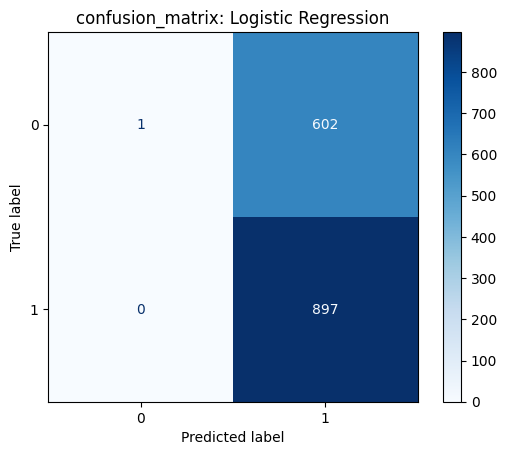

Training Random Forest...
Random Forest Accuracy: 0.5746666666666667


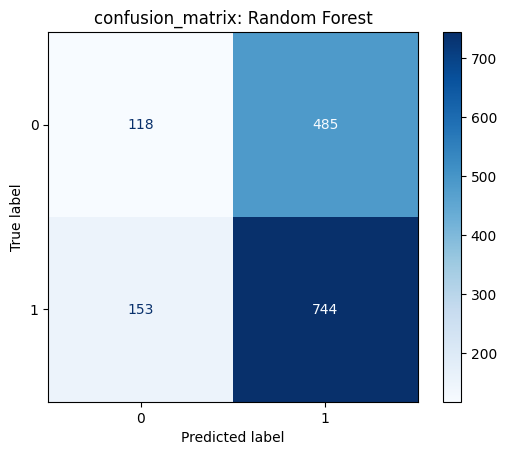

Training KNN...
KNN Accuracy: 0.5286666666666666


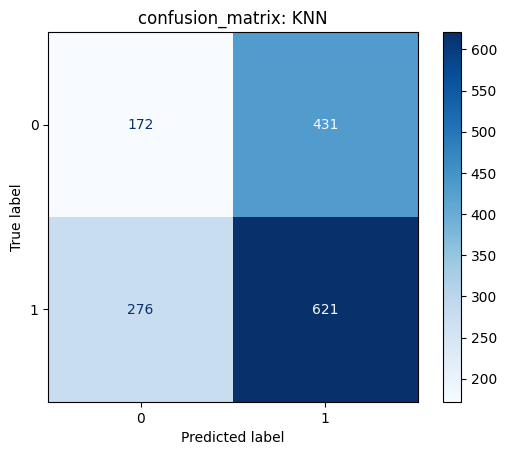

Training SVM...
SVM Accuracy: 0.598


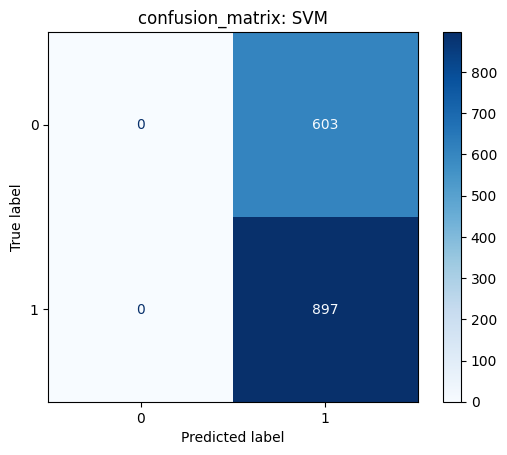

In [882]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix


results={}
for model_name, model in models.items():
    print(f'Training {model_name}...')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[model_name] = accuracy
    print(f'{model_name} Accuracy: {accuracy}')

    # Include the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)

    # plot with model name as title
    disp.plot(cmap='Blues')
    plt.title(f'confusion_matrix: {model_name}')
    plt.show()


accuracy score: 0.4746666666666667
              precision    recall  f1-score   support

       False       0.41      0.65      0.50       610
        True       0.60      0.36      0.45       890

    accuracy                           0.47      1500
   macro avg       0.50      0.50      0.47      1500
weighted avg       0.52      0.47      0.47      1500



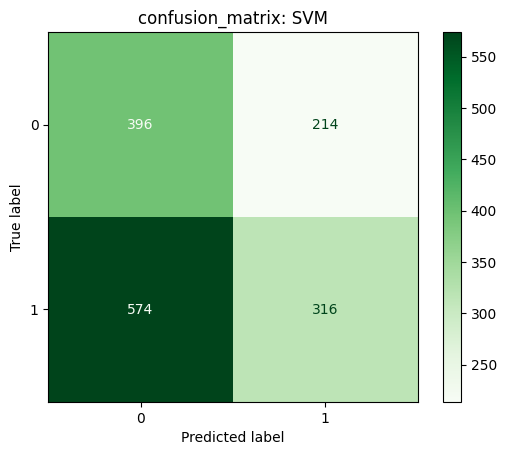

In [ ]:
#Evaluate the model using accuracy , precision, Recall , F1-score and a Confusion Matrix
from sklearn.metrics import classification_report

Best_Model = RandomForestClassifier()
Best_Model.fit(x_train, y_train)
y_pred = Best_Model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print(f'accuracy score: {accuracy}')
print(classification_report(y_test, y_pred, zero_division= 1))

# Include the confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# plot with model name as title
disp.plot(cmap='Greens')
plt.title(f'confusion_matrix: {model_name}')
plt.show()

Hyperparater

In [892]:
rfc= RandomForestClassifier(random_state=2)

rfc.get_params()


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 2,
 'verbose': 0,
 'warm_start': False}

In [893]:
# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(5, 16, 5),
    "min_samples_leaf": [3, 5, 7],
    "max_leaf_nodes": [2, 5],
    "min_impurity_decrease": [0.0001, 0.001],
}


In [894]:
from sklearn.model_selection import GridSearchCV


rfc_obj = RandomForestClassifier()

grid_obj = GridSearchCV(rfc,param_grid=parameters,n_jobs=-1,verbose=True) ## Complete the code to run grid search with n_jobs = -1

grid_obj = grid_obj.fit(x_train,y_train) ## Complete the code to fit the grid_obj on the train data

# Set the clf to the best combination of parameters
rfc_estimator = grid_obj.best_estimator_



Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [895]:
# Fit the best algorithm to the data.
rfc_estimator.fit(x_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,np.int64(5)
,min_samples_split,2
,min_samples_leaf,3
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,2
,min_impurity_decrease,0.0001
,bootstrap,True
,oob_score,False


In [896]:
# import joblib
# joblib.dump(model, 'model.pkl')
import joblib
from sklearn.metrics import classification_report
joblib.dump(Best_Model, "model.pkl")
# # save the scalar
joblib.dump(scaler, "scaler.pkl")

# print('model and scaler has been successful saved')

['scaler.pkl']

In [897]:
y_pred = Best_Model.predict(x_test)
accuracy= accuracy_score(y_test, y_pred)
print(f'accuracy score: {accuracy}')
print(classification_report(y_test, y_pred, zero_division= 1))

accuracy score: 0.494
              precision    recall  f1-score   support

       False       0.42      0.67      0.52       603
        True       0.63      0.37      0.47       897

    accuracy                           0.49      1500
   macro avg       0.52      0.52      0.49      1500
weighted avg       0.55      0.49      0.49      1500



In [ ]:
# Choose the type of classifier.
from xgboost import XGBClassifier

xgb_tuned = XGBClassifier(random_state=1, eval_metric="logloss")

# Grid of parameters to choose from
parameters = {
    "n_estimators": np.arange(150, 250, 50),
    "scale_pos_weight": [1, 2],
    "subsample": [0.9, 1],
    "learning_rate": np.arange(0.1, 0.21, 0.1),
    "gamma": [3, 5],
    "colsample_bytree": [0.8, 0.9],
    "colsample_bylevel": [ 0.9, 1],
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned,param_grid=parameters,cv=5,verbose=True) ## Complete the code to run grid search with cv = 5
grid_obj = grid_obj.fit(x_train,y_train) ## Complete the code to fit the grid_obj on train data

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(x_train, y_train)